<a href="https://colab.research.google.com/github/kwanqing/CMPE252/blob/main/CMPE252_SEC01_SP2023_HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Home Assigment 1, CMPE 252, Section 01, Fall 2023, San Jose State University
#### Informative Search using A* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)
All the required utility functions are provided at the beginning of this notebook. There are 8 tasks
after the utility functions, and a bonus task (10 additional points to HW1, if solved correclty).

**This assignment is individual**.

The deadline is Septemper 14, 2023, 11:59PM. The submission is in Canvas.

**please submit two separate files (not in a ZIP file) this notebook and its corresponding PDF (File->Download as -> PDF)**

import the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import sys
import networkx as nx
import time
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [ ]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

define START and GOAL states within the maze

***Visualize the maze***:

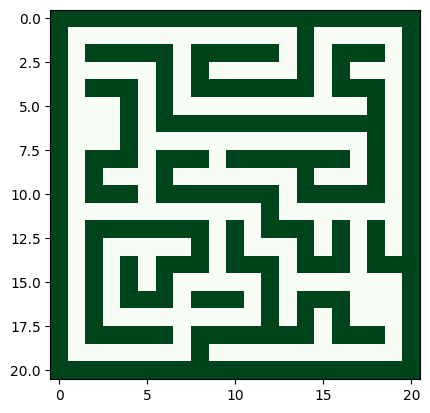

In [ ]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')

In [ ]:
START=(1, 1)
GOAL=(19,19)
# Goal for 50X50 maze is (1,49)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [ ]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

***Breadth First Search (BFS)***

In [ ]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()

    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array\npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [ ]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

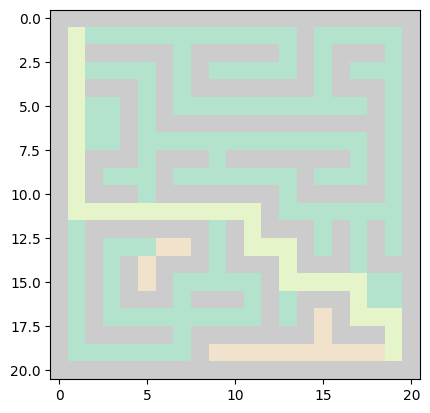

In [ ]:
plt.imshow(maze1, cmap='Pastel2')

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

***A**** ***-search***

In [ ]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self) -> bool:
        return not self.elements

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start:
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start)
    path.reverse()
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array\npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

***Dijkstra Algorithm***

In [ ]:
def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())

    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph
    shortest_path = {}

    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}

    # We'll use max_value to initialize the "infinity" value of the unvisited nodes
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0
    shortest_path[start_node] = 0

    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node

        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node

        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START:
        path.append(current)
        # print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START)
    path.reverse()
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''


'\nvisited nodes - mark them as -3 in maze numpy array\npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences)
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze.
Use your maze in the below tasks.

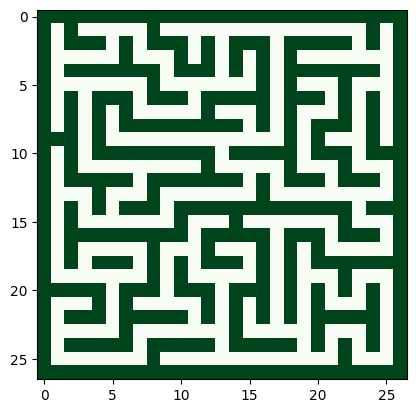

In [ ]:
# Visualize the maze
plt.imshow(build_maze("my_maze_25x25.txt"), cmap='Greens')

In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph25=Find_the_edges(maze25)
START25=(1, 1)
GOAL25=(25, 25)

### Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates

In [ ]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - GOAL[0])**2 + (node1[1] - node2[1])**2)**0.5
    #return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    pass



In [ ]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])

#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

In [ ]:
def astar_path_new(graph, start, goal, heuristic, W):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    para4: heuristic function
    para5: weight W
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0

    expanded_nodes_count = 0  # Initialize the count of expanded nodes

    while not frontier.empty():
        current = frontier.get()

        expanded_nodes_count += 1

        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze25[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + W * heuristic(next, goal)
                #priority = new_cost + Euclidean_distance(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start:
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start)
    path.reverse()

    return came_from, path, expanded_nodes_count

In [ ]:
# For Euclidean distance with W=1
came_from1, path1, _ = astar_path_new(graph25, START25, GOAL25, Euclidean_distance, W=1)
length1 = len(path1)-1
print("Shortest path length using Euclidean Distance:", length1)
path1

Shortest path length using Euclidean Distance: 80


[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 3),
 (10, 3),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7),
 (12, 7),
 (13, 7),
 (13, 6),
 (13, 5),
 (14, 5),
 (15, 5),
 (15, 4),
 (15, 3),
 (14, 3),
 (13, 3),
 (13, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (19, 2),
 (19, 3),
 (19, 4),
 (19, 5),
 (20, 5),
 (21, 5),
 (22, 5),
 (23, 5),
 (23, 4),
 (23, 3),
 (23, 2),
 (23, 1),
 (24, 1),
 (25, 1),
 (25, 2),
 (25, 3),
 (25, 4),
 (25, 5),
 (25, 6),
 (25, 7),
 (24, 7),
 (23, 7),
 (23, 8),
 (23, 9),
 (23, 10),
 (23, 11),
 (23, 12),
 (23, 13),
 (24, 13),
 (25, 13),
 (25, 14),
 (25, 15),
 (25, 16),
 (25, 17),
 (25, 18),
 (25, 19),
 (25, 20),
 (25, 21),
 (24, 21),
 (23, 21),
 (23, 22),
 (23, 23),
 (24, 23),
 (25, 23),
 (25, 24),
 (25, 25)]

In [ ]:
# For Manhattan distance with W=1
came_from2, path2, _ = astar_path_new(graph25, START25, GOAL25, Manhattan_distance, W=1)
length2 = len(path2)-1
print("Shortest path length using Manhattan Distance:", length2)
path2

Shortest path length using Manhattan Distance: 80


[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 3),
 (10, 3),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7),
 (12, 7),
 (13, 7),
 (13, 6),
 (13, 5),
 (14, 5),
 (15, 5),
 (15, 4),
 (15, 3),
 (14, 3),
 (13, 3),
 (13, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (19, 2),
 (19, 3),
 (19, 4),
 (19, 5),
 (20, 5),
 (21, 5),
 (22, 5),
 (23, 5),
 (23, 4),
 (23, 3),
 (23, 2),
 (23, 1),
 (24, 1),
 (25, 1),
 (25, 2),
 (25, 3),
 (25, 4),
 (25, 5),
 (25, 6),
 (25, 7),
 (24, 7),
 (23, 7),
 (23, 8),
 (23, 9),
 (23, 10),
 (23, 11),
 (23, 12),
 (23, 13),
 (24, 13),
 (25, 13),
 (25, 14),
 (25, 15),
 (25, 16),
 (25, 17),
 (25, 18),
 (25, 19),
 (25, 20),
 (25, 21),
 (24, 21),
 (23, 21),
 (23, 22),
 (23, 23),
 (24, 23),
 (25, 23),
 (25, 24),
 (25, 25)]

### Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

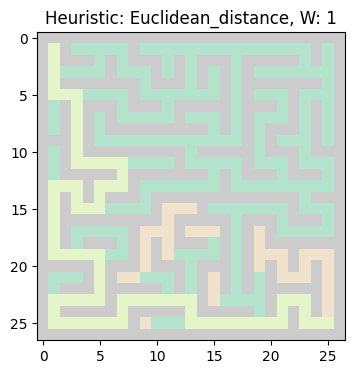

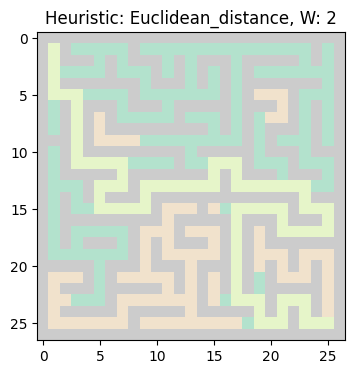

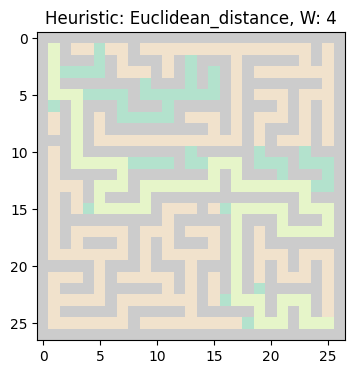

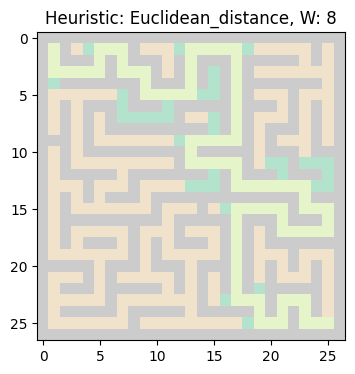

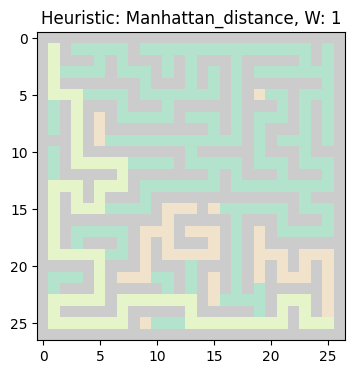

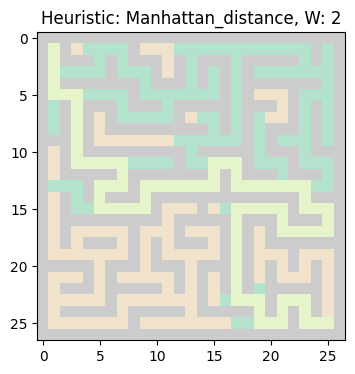

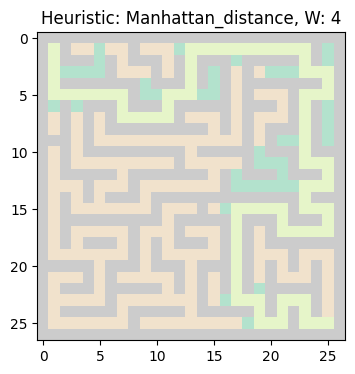

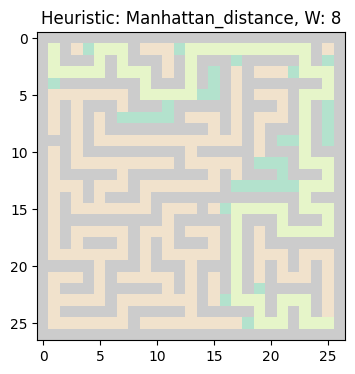

In [ ]:
weights = [1, 2, 4, 8]

START=(1, 1)
#GOAL=(19, 19)
GOAL=(25, 25)

heuristics = [Euclidean_distance, Manhattan_distance]

for heuristic in heuristics:
    for W in weights:
        maze25=build_maze("my_maze_25x25.txt")
        #maze25=build_maze("maze_20x20.txt")
        graph=Find_the_edges(maze25)
        visited, path, _ = astar_path_new(graph, START, GOAL, heuristic, W)
        for i in visited:
            maze25[i[0],i[1]]=-3
        for i in path:
            maze25[i[0],i[1]]=-1

        plt.figure(figsize=(4, 4))
        plt.title(f'Heuristic: {heuristic.__name__}, W: {W}')
        plt.imshow(maze25, cmap='Pastel2')

Explain what changes you observe for the different weights and why it occurs.

When we are changing the weight W in A* search algorithm, we are essentially changing the influence of the heuristic in pathfinding.

W = 1 :
This is where the heuristic has a balanced influence, making it a combination of greedy and optimal pathfinding. This is the standard A* algorithm where it guaranteed to find the shortest path if the heuristic is admissible and consistent.

W = 2  :
The algorithm is more likely to follow the direction of the heuristic, sometimes at the expense of finding the optimal path. It explores fewer nodes, making it faster but potentially less accurate and he path found may not be the shortest one.

W = 4/8 :
At very high weights, the algorithm becomes extremely greedy and resembles Best-First Search. It will reach the goal quickly but may choose a highly suboptimal path.

Why it occurs:
Higher values of W make the heuristic term dominate causing the algorithm to follow the heuristic more closely.Lower values of W make the heuristic's influence weaker, causing the algorithm to behave more like Dijkstra's algorithm where it considers the actual cost more than the heuristic.

### Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

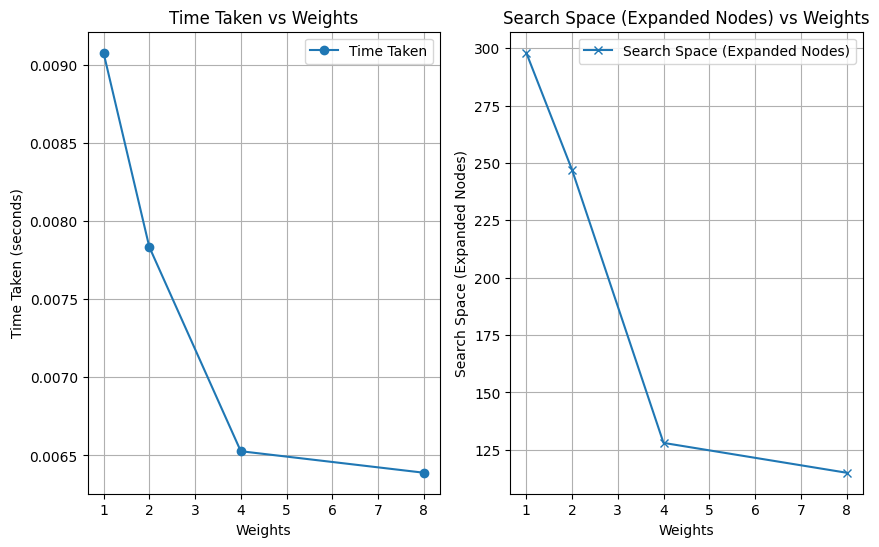

In [ ]:
weights = [1, 2, 4, 8]
times = []
expanded_nodes = []

START=(1, 1)
GOAL=(25, 25)

for W in weights:
    start_time = time.time()
    maze25=build_maze("my_maze_25x25.txt")
    graph=Find_the_edges(maze25)
    heuristic = Euclidean_distance
    visited, path, count_expanded_nodes = astar_path_new(graph, START, GOAL, heuristic, W)
    end_time = time.time()
    elapsed_time = end_time - start_time

    expanded = count_expanded_nodes

    times.append(elapsed_time)
    expanded_nodes.append(expanded)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

axs[0].plot(weights, times, marker='o')
axs[0].set_title('Time Taken vs Weights')
axs[0].set_xlabel('Weights')
axs[0].set_ylabel('Time Taken (seconds)')
axs[0].grid(True)

axs[1].plot(weights, expanded_nodes, marker='x')
axs[1].set_title('Search Space (Expanded Nodes) vs Weights')
axs[1].set_xlabel('Weights')
axs[1].set_ylabel('Search Space (Expanded Nodes)')
axs[1].grid(True)

axs[0].legend(['Time Taken'])
axs[1].legend(['Search Space (Expanded Nodes)'])

plt.show()

### Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path length using Dijkstra Algorithm: 80


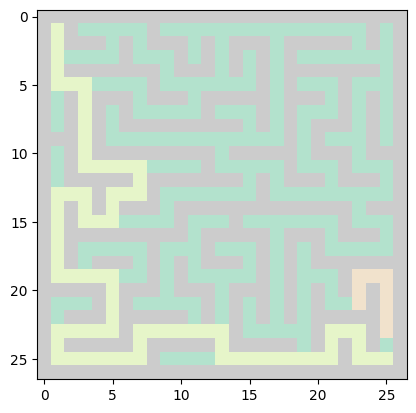

In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze25)
START=(1, 1)
GOAL=(25, 25)
visited, path_dijkstra = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze25[i[0],i[1]]=-3
for i in path_dijkstra:
    maze25[i[0],i[1]]=-1

plt.imshow(maze25, cmap='Pastel2')

length_dijkstra = len(path_dijkstra)-1
print("Shortest path length using Dijkstra Algorithm:", length_dijkstra)

### Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path length using BFS Algorithm: 80


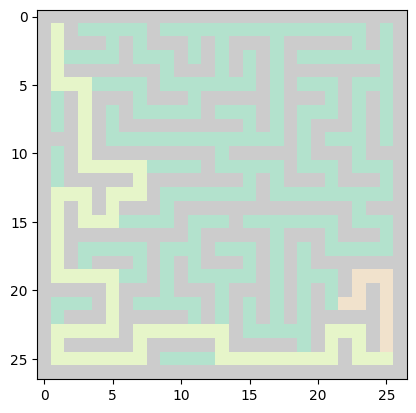

In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze25)
START=(1, 1)
GOAL=(25, 25)
visited, path_BFS = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze25[i[0],i[1]]=-3
for i in path_BFS:
    maze25[i[0],i[1]]=-1

plt.imshow(maze25, cmap='Pastel2')

length_BFS = len(path_BFS)-1
print("Shortest path length using BFS Algorithm:", length_BFS)

### Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

I randomly chose 3 START and GOAL states as (25, 25, 10, 1), (2, 1, 25, 15), (1, 25, 25, 1). From my observations, all the algorithms are finding the same shortest path length for 3 different START and GOAL states. Dijkstra algorithm will relatively take more times as compared to BFS, A* Manhattan and A* Euclidean algorithm to find the shortest path length. As for the number of nodes explored by each algorithms, A* Manhattan and A* Euclidean explore fewer nodes compared to BFS and Dijkstra because it uses a heuristic to guide the search towards the goal.



Shortest path length of A* Algorithm using Manhattan Distance  from (25, 25) to (10, 1): 55


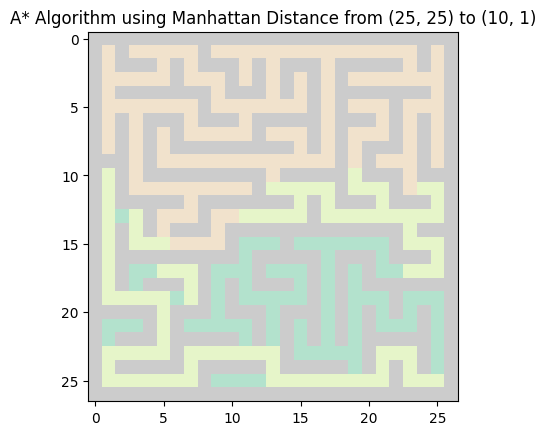

Shortest path length of A* Algorithm using Euclidean Distance  from (25, 25) to (10, 1): 55


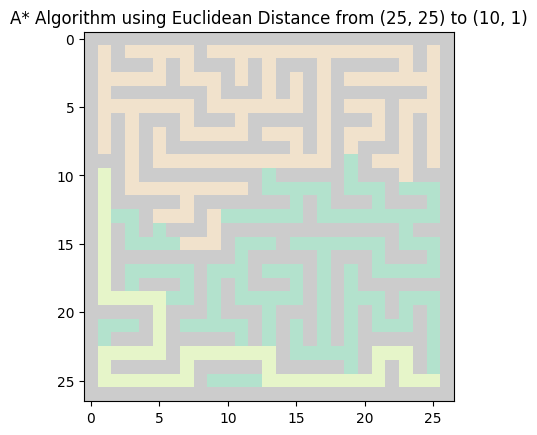

Shortest path length of A* Algorithm using Manhattan Distance  from (2, 1) to (25, 15): 65


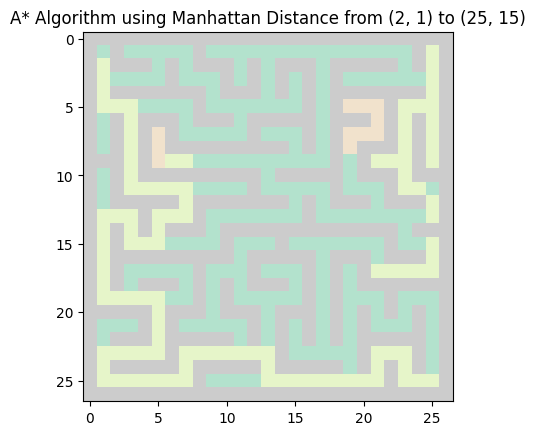

Shortest path length of A* Algorithm using Euclidean Distance  from (2, 1) to (25, 15): 65


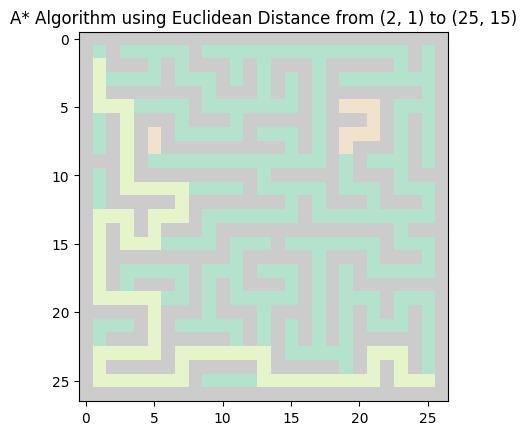

Shortest path length of A* Algorithm using Manhattan Distance  from (1, 25) to (25, 1): 68


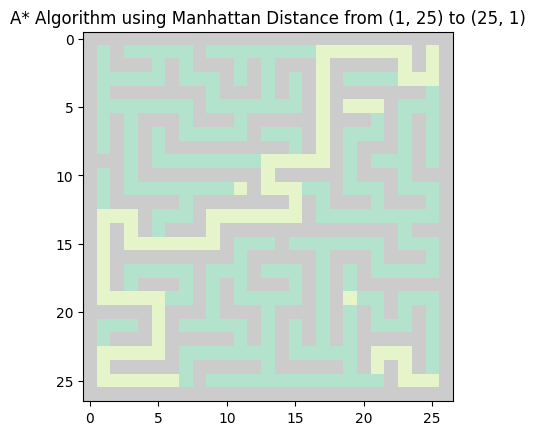

Shortest path length of A* Algorithm using Euclidean Distance  from (1, 25) to (25, 1): 68


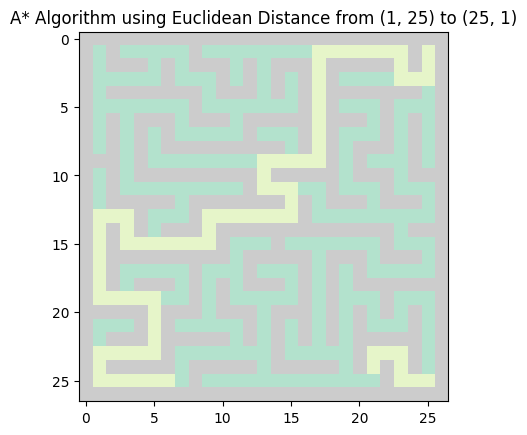

Time taken of A* Algorithm using Manhattan Distance from different START and GOAL states:  [0.0006818771362304688, 0.0011684894561767578, 0.0007846355438232422]
Search Space (Expanded Nodes) of A* Algorithm using Euclidean Distance from different START and GOAL states:  [144, 212, 274]
Time taken of A* Algorithm using Manhattan Distance from different START and GOAL states:  [0.001001596450805664, 0.0014395713806152344, 0.0008213520050048828]
Search Space (Expanded Nodes) of A* Algorithm using Euclidean Distance from different START and GOAL states:  [197, 248, 285]


In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph25=Find_the_edges(maze25)
times_manhattan = []
times_euclidean = []
nodes_explored_manhattan = []
nodes_explored_euclidean = []

random_states = [(25, 25, 10, 1), (2, 1, 25, 15), (1, 25, 25, 1)]
# Loop over each random pair of START and GOAL states
for start_x, start_y, goal_x, goal_y in random_states:
    start = (start_x, start_y)
    goal = (goal_x, goal_y)

    start_time_manhattan = time.time()
    # Run A* algorithm with Manhattan Distance and W=1
    visited_nodes_manhattan, path_manhattan, _ = astar_path_new(graph25, start, goal, Manhattan_distance, W=1)
    end_time_manhattan = time.time()

    start_time_euclidean = time.time()
    # Run A* algorithm with Euclidean Distance and W=1
    visited_nodes_euclidean, path_euclidean, _ = astar_path_new(graph25, start, goal, Euclidean_distance, W=1)
    end_time_euclidean = time.time()

    elapsed_time_manhattan = end_time_manhattan - start_time_manhattan
    times_manhattan.append(elapsed_time_manhattan)
    nodes_explored_manhattan.append(len(visited_nodes_manhattan))

    elapsed_time_euclidean = end_time_euclidean - start_time_euclidean
    times_euclidean.append(elapsed_time_euclidean)
    nodes_explored_euclidean.append(len(visited_nodes_euclidean))

    # Visualize the paths and visited nodes for each heuristic
    for heuristic, path, visited in [('Manhattan', path_manhattan, visited_nodes_manhattan), ('Euclidean', path_euclidean, visited_nodes_euclidean)]:
        plt.figure()
        length = len(path)-1
        print(f"Shortest path length of A* Algorithm using {heuristic} Distance  from {start} to {goal}:", length)
        plt.title(f"A* Algorithm using {heuristic} Distance from {start} to {goal}")

        for i in visited:
            maze25[i[0],i[1]]=-3
        for i in path:
            maze25[i[0],i[1]]=-1

        plt.imshow(maze25, cmap='Pastel2')

        plt.show()

print("Time taken of A* Algorithm using Manhattan Distance from different START and GOAL states: ", times_manhattan)
print("Search Space (Expanded Nodes) of A* Algorithm using Euclidean Distance from different START and GOAL states: ",nodes_explored_manhattan)

print("Time taken of A* Algorithm using Manhattan Distance from different START and GOAL states: ", times_euclidean)
print("Search Space (Expanded Nodes) of A* Algorithm using Euclidean Distance from different START and GOAL states: ", nodes_explored_euclidean)

Shortest path length using Breath First Search from (25, 25) to (10, 1): 55


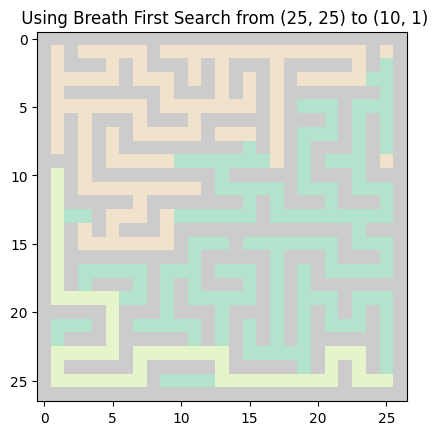

Shortest path length using Breath First Search from (2, 1) to (25, 15): 65


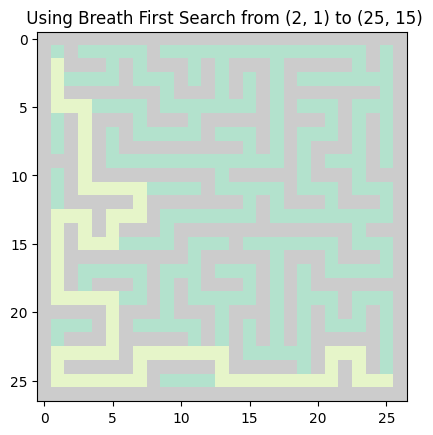

Shortest path length using Breath First Search from (1, 25) to (25, 1): 68


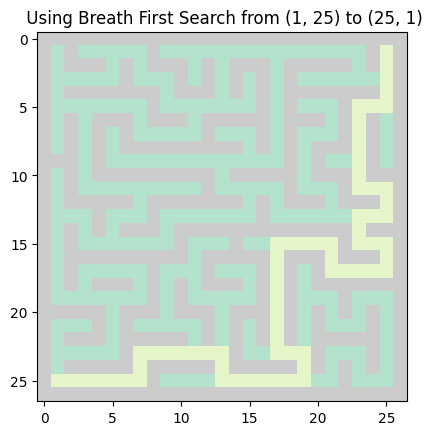

Time taken using BFS algorithm from different START and GOAL states:  [0.0006935596466064453, 0.0006003379821777344, 0.001201629638671875]
Search Space (Expanded Nodes) using BFS algorithm from different START and GOAL states:  [223, 277, 340]


In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph25=Find_the_edges(maze25)
times_breathfirst = []
nodes_explored_breathfirst = []

random_states = [(25, 25, 10, 1), (2, 1, 25, 15), (1, 25, 25, 1)]

# Loop over each random pair of START and GOAL states
for start_x, start_y, goal_x, goal_y in random_states:
    start = (start_x, start_y)
    goal = (goal_x, goal_y)

    start_time = time.time()
    # Run Breath First Search algorithm
    visited_nodes_breathfirst, path_breathfirst = BreadthFirst(graph25, start, goal)
    end_time = time.time()

    elapsed_time = end_time - start_time
    times_breathfirst.append(elapsed_time)
    nodes_explored_breathfirst.append(len(visited_nodes_breathfirst))

    # Visualize the paths and visited nodes for each algorithm
    for algo, path, visited in [('Breath First Search', path_breathfirst, visited_nodes_breathfirst)]:
        plt.figure()
        length_BFS = len(path)-1
        print(f"Shortest path length using {algo} from {start} to {goal}:", length_BFS)
        plt.title(f" Using {algo} from {start} to {goal}")

        for i in visited:
            maze25[i[0],i[1]]=-3
        for i in path:
            maze25[i[0],i[1]]=-1

        plt.imshow(maze25, cmap='Pastel2')
        plt.show()

print("Time taken using BFS algorithm from different START and GOAL states: ", times_breathfirst)
print("Search Space (Expanded Nodes) using BFS algorithm from different START and GOAL states: ", nodes_explored_breathfirst)

Shortest path length using Dijkstra Algorithm from (25, 25) to (10, 1): 55
Time taken using Dijkstra algorithm from different START and GOAL states:  [0.01891613006591797]
Search Space (Expanded Nodes) using Dijkstra algorithm from different START and GOAL states:  [230]


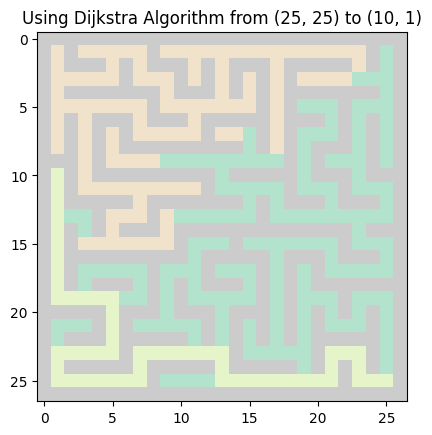

In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze25)
times_dijkstra = []
nodes_explored_dijkstra = []

START=(25, 25)
GOAL=(10, 1)

start_time = time.time()
visited, path_dijkstra = dijkstra_algorithm(graph, START, GOAL)
end_time = time.time()

elapsed_time = end_time - start_time
times_dijkstra.append(elapsed_time)
nodes_explored_dijkstra.append(len(visited))

for i in visited:
    maze25[i[0],i[1]]=-3
for i in path_dijkstra:
    maze25[i[0],i[1]]=-1

plt.figure()
length_dijkstra = len(path_dijkstra)-1
print(f"Shortest path length using Dijkstra Algorithm from {START} to {GOAL}:", length_dijkstra)
plt.title(f"Using Dijkstra Algorithm from {START} to {GOAL}")
plt.imshow(maze25, cmap='Pastel2')

print("Time taken using Dijkstra algorithm from different START and GOAL states: ", times_dijkstra)
print("Search Space (Expanded Nodes) using Dijkstra algorithm from different START and GOAL states: ", nodes_explored_dijkstra)

Shortest path length using Dijkstra Algorithm from (2, 1) to (25, 15): 65
Time taken using Dijkstra algorithm from different START and GOAL states:  [0.01891613006591797, 0.039919137954711914]
Search Space (Expanded Nodes) using Dijkstra algorithm from different START and GOAL states:  [230, 284]


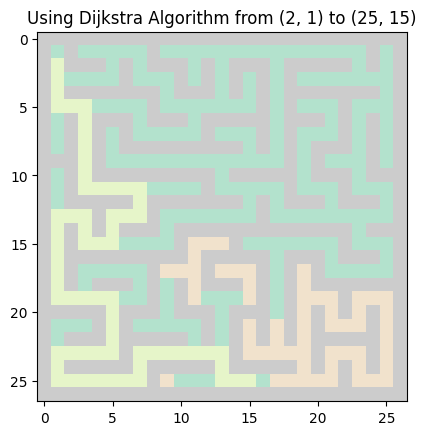

In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze25)
START=(2, 1)
GOAL=(25, 15)

start_time = time.time()
visited, path_dijkstra = dijkstra_algorithm(graph, START, GOAL)
end_time = time.time()

elapsed_time = end_time - start_time
times_dijkstra.append(elapsed_time)
nodes_explored_dijkstra.append(len(visited))

for i in visited:
    maze25[i[0],i[1]]=-3
for i in path_dijkstra:
    maze25[i[0],i[1]]=-1

plt.figure()
plt.title(f"Using Dijkstra Algorithm from {START} to {GOAL}")
plt.imshow(maze25, cmap='Pastel2')

length_dijkstra = len(path_dijkstra)-1
print(f"Shortest path length using Dijkstra Algorithm from {START} to {GOAL}:", length_dijkstra)

print("Time taken using Dijkstra algorithm from different START and GOAL states: ", times_dijkstra)
print("Search Space (Expanded Nodes) using Dijkstra algorithm from different START and GOAL states: ", nodes_explored_dijkstra)

Shortest path length using Dijkstra Algorithm from (1, 25) to (25, 1): 68
Time taken using Dijkstra algorithm from different START and GOAL states:  [0.01891613006591797, 0.039919137954711914, 0.010615825653076172]
Search Space (Expanded Nodes) using Dijkstra algorithm from different START and GOAL states:  [230, 284, 342]


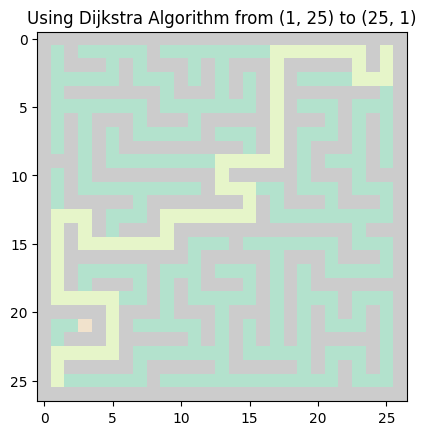

In [ ]:
maze25=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze25)
START=(1, 25)
GOAL=(25, 1)

start_time = time.time()
visited, path_dijkstra = dijkstra_algorithm(graph, START, GOAL)
end_time = time.time()

elapsed_time = end_time - start_time
times_dijkstra.append(elapsed_time)
nodes_explored_dijkstra.append(len(visited))

for i in visited:
    maze25[i[0],i[1]]=-3
for i in path_dijkstra:
    maze25[i[0],i[1]]=-1

plt.figure()
plt.title(f"Using Dijkstra Algorithm from {START} to {GOAL}")
plt.imshow(maze25, cmap='Pastel2')

length_dijkstra = len(path_dijkstra)-1
print(f"Shortest path length using Dijkstra Algorithm from {START} to {GOAL}:", length_dijkstra)

print("Time taken using Dijkstra algorithm from different START and GOAL states: ", times_dijkstra)
print("Search Space (Expanded Nodes) using Dijkstra algorithm from different START and GOAL states: ", nodes_explored_dijkstra)

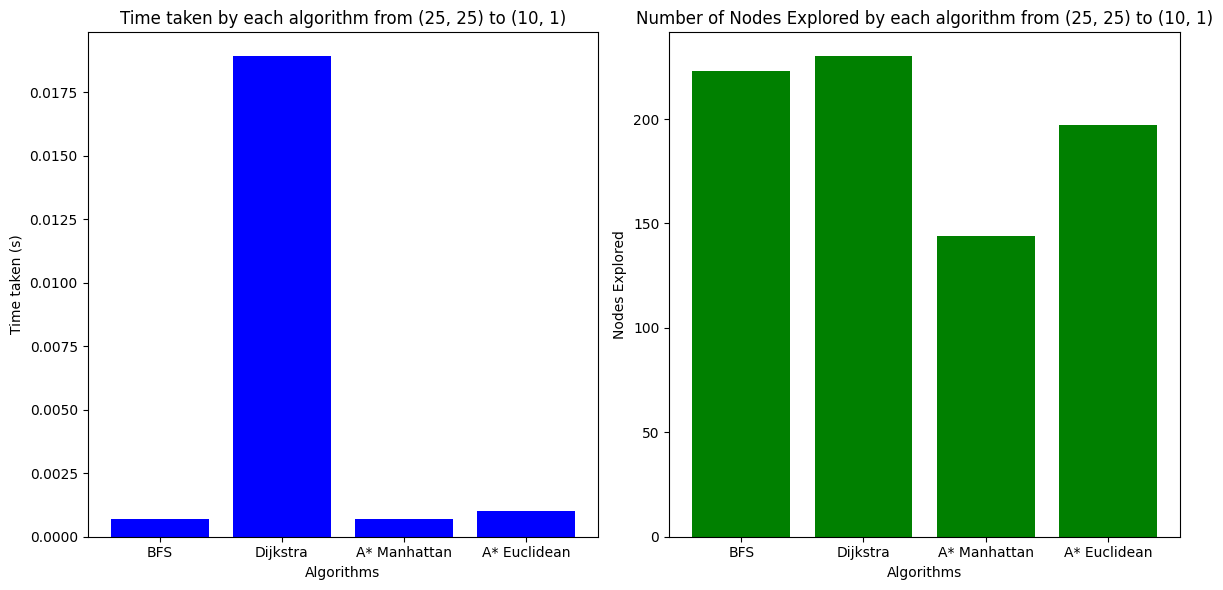

In [ ]:
algorithms = ['BFS', 'Dijkstra', 'A* Manhattan', 'A* Euclidean']
times = [times_breathfirst[0], times_dijkstra[0], times_manhattan[0], times_euclidean[0]]
nodes_explored = [nodes_explored_breathfirst[0], nodes_explored_dijkstra[0], nodes_explored_manhattan[0], nodes_explored_euclidean[0]]
START=(25, 25)
GOAL=(10, 1)

# Plot time taken vs algorithms
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(algorithms, times, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Time taken (s)')
plt.title(f'Time taken by each algorithm from {START} to {GOAL}')

# Plot number of nodes explored vs algorithms
plt.subplot(122)
plt.bar(algorithms, nodes_explored, color='green')
plt.xlabel('Algorithms')
plt.ylabel('Nodes Explored')
plt.title(f'Number of Nodes Explored by each algorithm from {START} to {GOAL}')

plt.tight_layout()
plt.show()

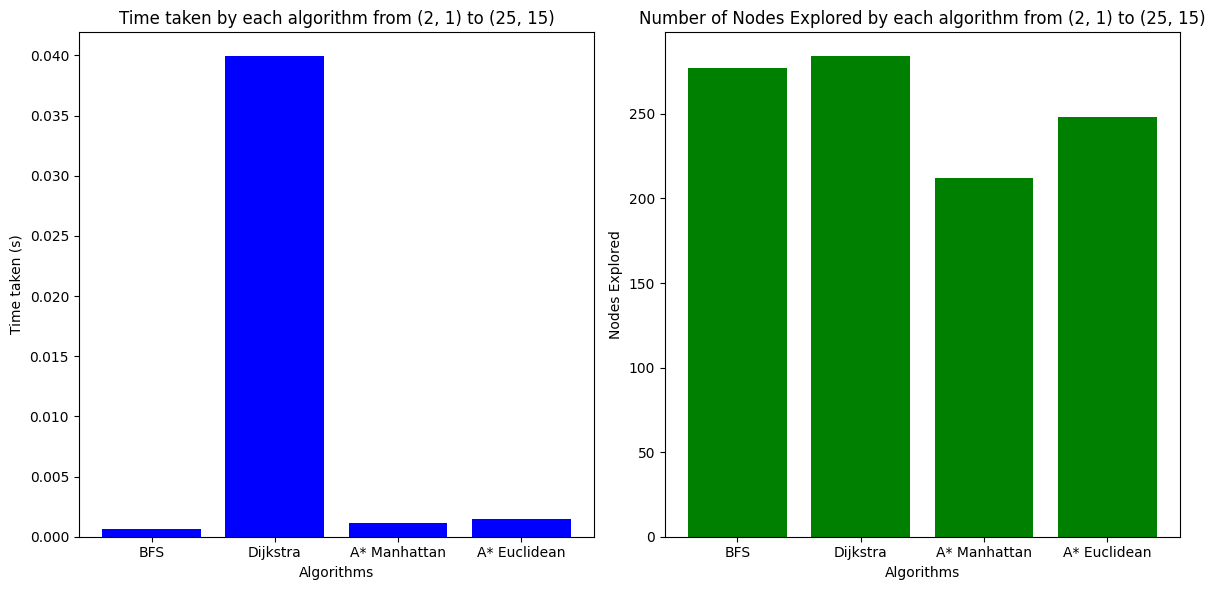

In [ ]:
algorithms = ['BFS', 'Dijkstra', 'A* Manhattan', 'A* Euclidean']
times = [times_breathfirst[1], times_dijkstra[1], times_manhattan[1], times_euclidean[1]]
nodes_explored = [nodes_explored_breathfirst[1], nodes_explored_dijkstra[1], nodes_explored_manhattan[1], nodes_explored_euclidean[1]]
START=(2, 1)
GOAL=(25, 15)

# Plot time taken vs algorithms
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(algorithms, times, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Time taken (s)')
plt.title(f'Time taken by each algorithm from {START} to {GOAL}')

# Plot number of nodes explored vs algorithms
plt.subplot(122)
plt.bar(algorithms, nodes_explored, color='green')
plt.xlabel('Algorithms')
plt.ylabel('Nodes Explored')
plt.title(f'Number of Nodes Explored by each algorithm from {START} to {GOAL}')

plt.tight_layout()
plt.show()

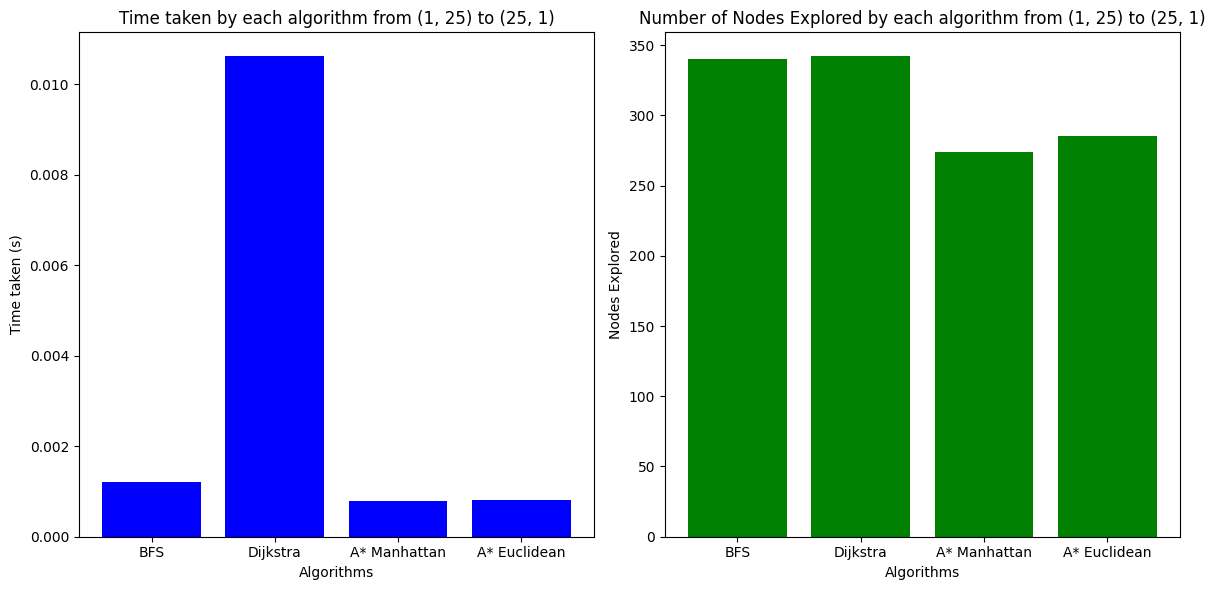

In [ ]:
algorithms = ['BFS', 'Dijkstra', 'A* Manhattan', 'A* Euclidean']
times = [times_breathfirst[2], times_dijkstra[2], times_manhattan[2], times_euclidean[2]]
nodes_explored = [nodes_explored_breathfirst[2], nodes_explored_dijkstra[2], nodes_explored_manhattan[2], nodes_explored_euclidean[2]]
START=(1, 25)
GOAL=(25, 1)

# Plot time taken vs algorithms
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.bar(algorithms, times, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Time taken (s)')
plt.title(f'Time taken by each algorithm from {START} to {GOAL}')

# Plot number of nodes explored vs algorithms
plt.subplot(122)
plt.bar(algorithms, nodes_explored, color='green')
plt.xlabel('Algorithms')
plt.ylabel('Nodes Explored')
plt.title(f'Number of Nodes Explored by each algorithm from {START} to {GOAL}')

plt.tight_layout()
plt.show()

### Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the tasks 1-6 (and visualize the solution for each). Use W=1 in this task (non need in **"Chose a broad set of values for W to see the difference"**). Explain your observations

 1. Shorter Paths: When diagonal moves are allowed, the shortest path is likely to be shorter in terms of the number of moves.

2. Reduced Expanded Nodes: The algorithm will now explore fewer nodes to find the shortest path since it can now move diagonally and skip over some nodes.

3. Time complexity: Now it can move diagonally, the algorithm have to check the nodes including diagonal neightbors and it may use more times as there are more neighbors to check for each node now.

In [ ]:
def Find_the_edges_diag(maze):
    edges = {}
    rows = len(maze)
    cols = len(maze[0])
    for row in range(rows):
        for col in range(cols):
            if maze[row][col] != 1:  # not a wall
                node = (row, col)
                neighbors = []
                # Consider UP, DOWN, LEFT, RIGHT, and now DIAGONAL directions
                for i in [-1, 0, 1]:
                    for j in [-1, 0, 1]:
                        if i == 0 and j == 0:
                            continue  # Skip the center point
                        new_row, new_col = row + i, col + j
                        if 0 <= new_row < rows and 0 <= new_col < cols:
                            if maze[new_row][new_col] != 1:
                                neighbors.append((new_row, new_col))
                edges[node] = neighbors
    return edges


Shortest path length using BFS Algorithm : 57


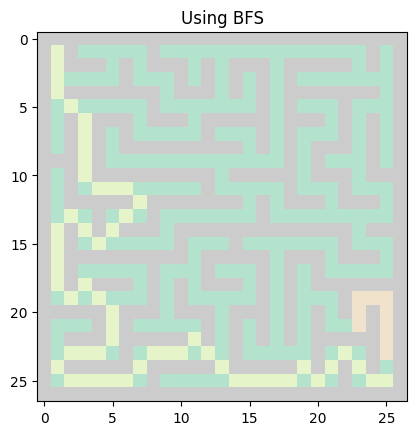

In [ ]:
maze_diag=build_maze("my_maze_25x25.txt")
graph_diag=Find_the_edges_diag(maze_diag)
START_diag=(1, 1)
GOAL_diag=(25, 25)
visited_diag, path_diag = BreadthFirst(graph_diag, START_diag, GOAL_diag)
for i in visited_diag:
    maze_diag[i[0],i[1]]=-3
for i in path_diag:
    maze_diag[i[0],i[1]]=-1

plt.title(f"Using BFS")
plt.imshow(maze_diag, cmap='Pastel2')

length_diag = len(path_diag)-1
print("Shortest path length using BFS Algorithm :", length_diag)

Shortest path length using Dijkstra Algorithm : 57


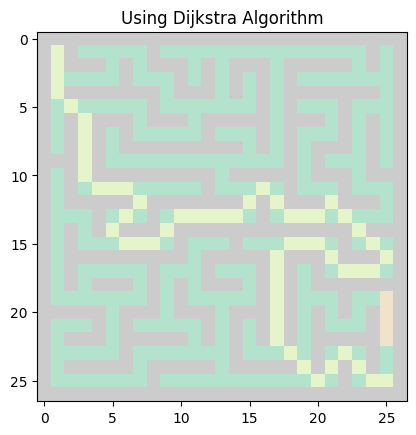

In [ ]:
maze_diag=build_maze("my_maze_25x25.txt")
graph_diag=Find_the_edges_diag(maze_diag)
START=(1, 1)
GOAL=(25, 25)
visited_diag, path_diag = dijkstra_algorithm(graph_diag, START, GOAL)
for i in visited_diag:
    maze_diag[i[0],i[1]]=-3
for i in path_diag:
    maze_diag[i[0],i[1]]=-1

plt.title(f"Using Dijkstra Algorithm")
plt.imshow(maze_diag, cmap='Pastel2')

length_diag = len(path_diag)-1
print("Shortest path length using Dijkstra Algorithm :", length_diag)

Shortest path length using Manhattan Distance: 57


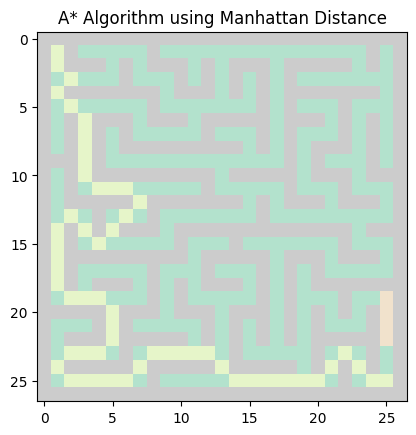

In [ ]:
visited_diag, path_diag, _ = astar_path_new(graph_diag, START_diag, GOAL_diag, Manhattan_distance, W=1)
for i in visited_diag:
    maze_diag[i[0],i[1]]=-3
for i in path_diag:
    maze_diag[i[0],i[1]]=-1

plt.title(f"A* Algorithm using Manhattan Distance")
plt.imshow(maze_diag, cmap='Pastel2')

length_diag = len(path_diag)-1
print("Shortest path length using Manhattan Distance:", length_diag)

Shortest path length using Euclidean Distance: 57


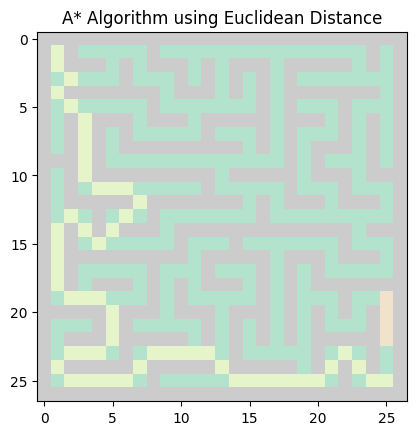

In [ ]:
visited_diag, path_diag, _ = astar_path_new(graph_diag, START_diag, GOAL_diag, Euclidean_distance, W=1)
for i in visited_diag:
    maze_diag[i[0],i[1]]=-3
for i in path_diag:
    maze_diag[i[0],i[1]]=-1

plt.title(f"A* Algorithm using Euclidean Distance")
plt.imshow(maze_diag, cmap='Pastel2')

length_diag = len(path_diag)-1
print("Shortest path length using Euclidean Distance:", length_diag)

### Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A*-Search
the initial and the final configurations are given at the image below.
you can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1
add you code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
![cmpe252_HW1_Bonus.png](attachment:cmpe252_HW1_Bonus.png)

In [ ]:
# The heuristic function
def h1(state, goal):
    return sum(s != g for (s, g) in zip(state, goal))

def neighbors(state):
    blank = state.index(0)
    i, j = divmod(blank, 3)
    offsets = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    for dx, dy in offsets:
        x, y = i + dx, j + dy
        if 0 <= x < 3 and 0 <= y < 3:
            s = list(state)
            s[blank], s[x * 3 + y] = s[x * 3 + y], s[blank]
            yield tuple(s)

# A* search
def astar_search(start, goal):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break

        for next_state in neighbors(current):
            new_cost = cost_so_far[current] + 1
            if next_state not in cost_so_far or new_cost < cost_so_far[next_state]:
                cost_so_far[next_state] = new_cost
                priority = new_cost + h1(next_state, goal)
                frontier.put(next_state, priority)
                came_from[next_state] = current

    current = goal
    path = []
    while current != start:
        prev = came_from[current]
        blank = current.index(0)
        moved_tile = prev[blank]
        path.append(moved_tile)
        current = prev
    path.reverse()
    return path

# Initial state and goal state
start = (7, 2, 4, 5, 0, 6, 8, 3, 1)
goal = (0, 1, 2, 3, 4, 5, 6, 7, 8)

solution = astar_search(start, goal)
print("Optimal action sequence:", solution)

Optimal action sequence: [5, 7, 2, 5, 6, 1, 3, 8, 7, 6, 1, 3, 8, 7, 6, 1, 3, 4, 5, 2, 1, 3, 4, 5, 2, 1]


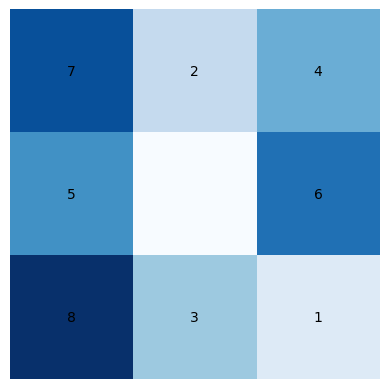

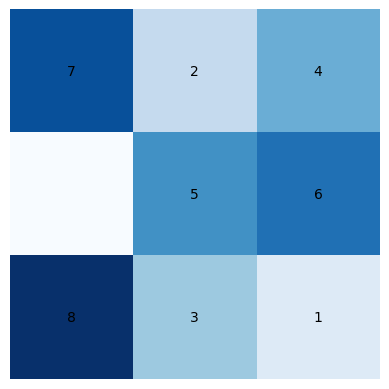

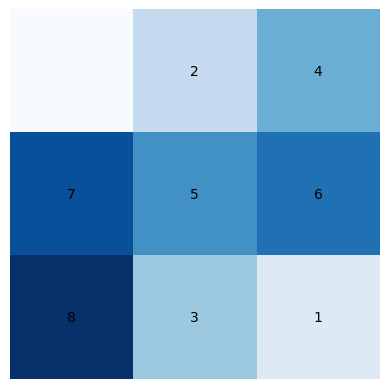

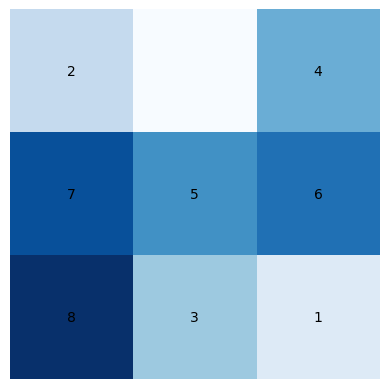

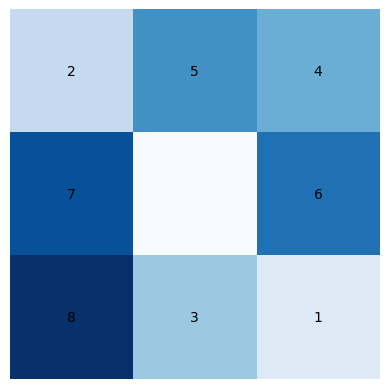

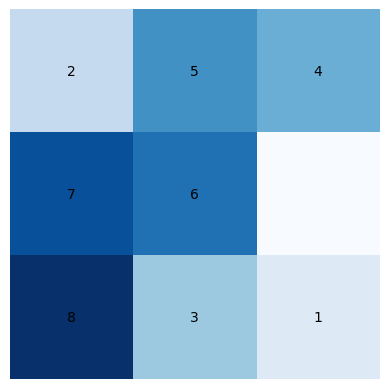

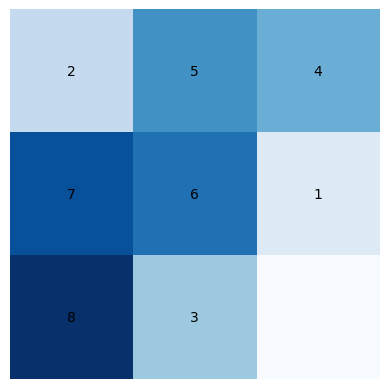

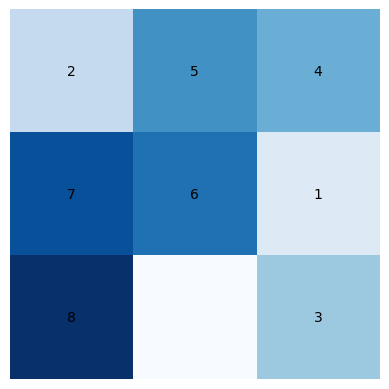

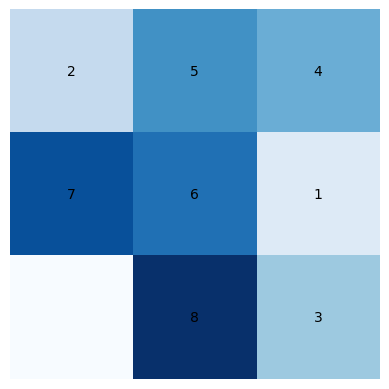

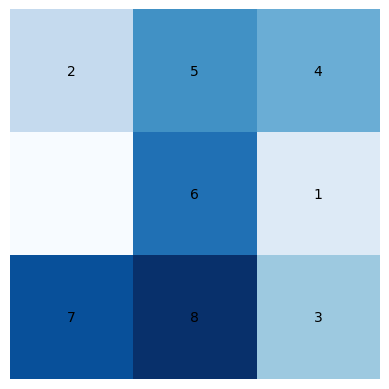

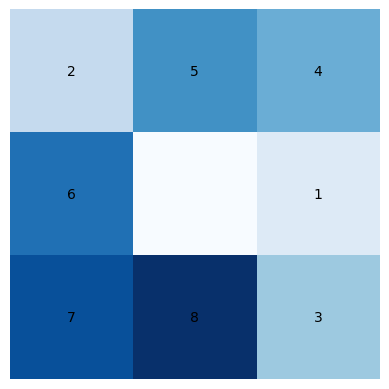

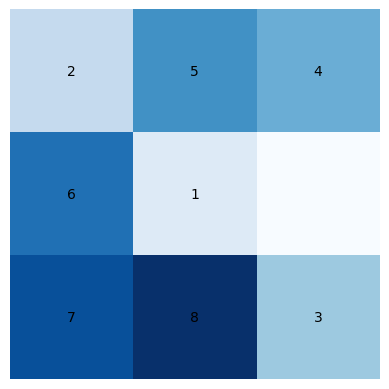

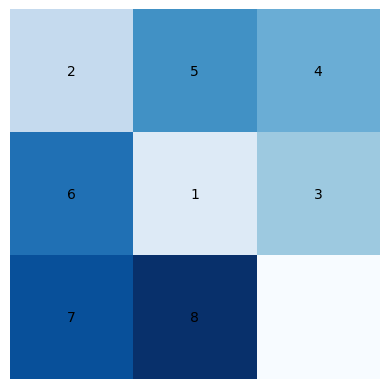

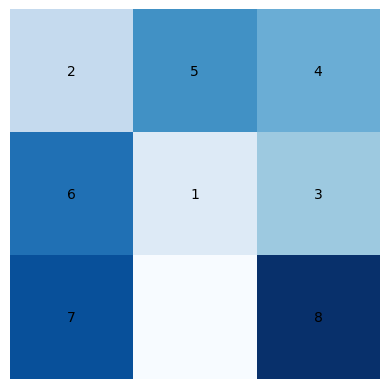

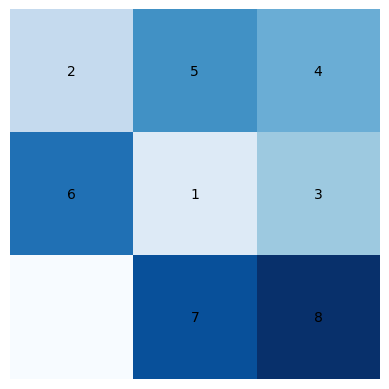

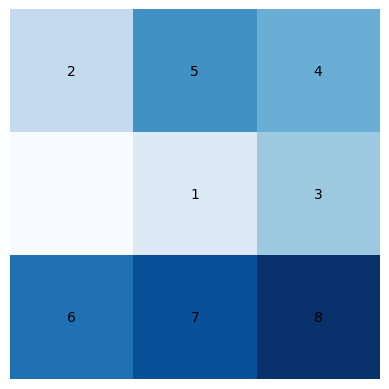

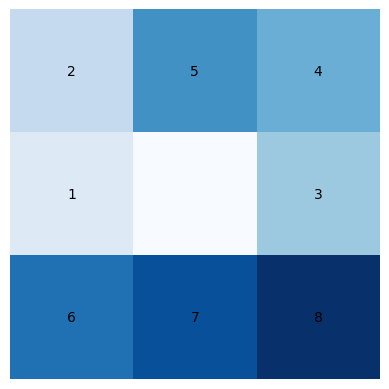

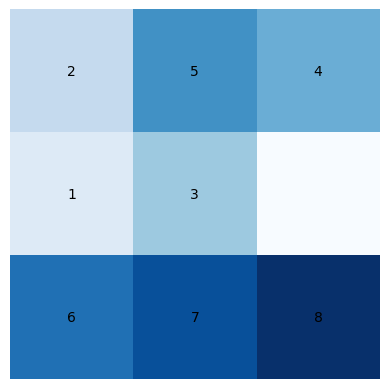

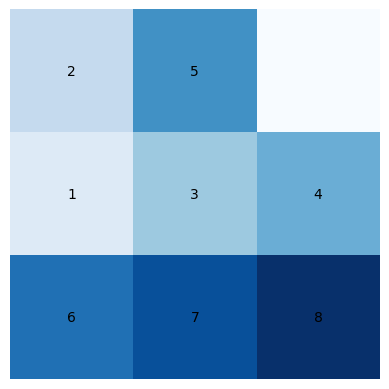

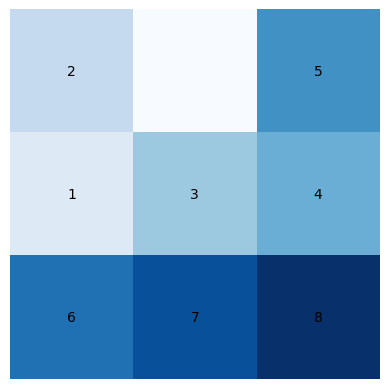

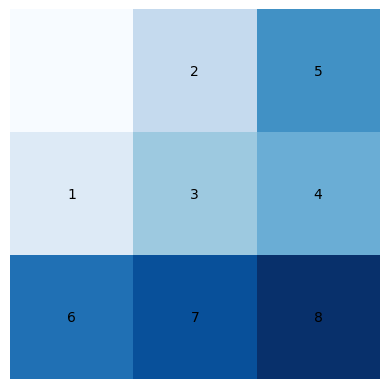

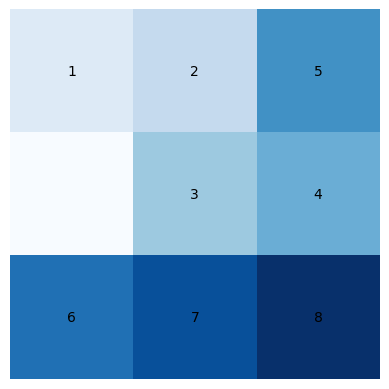

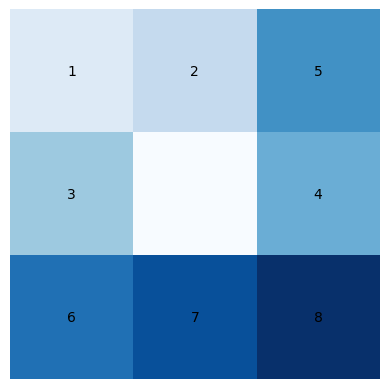

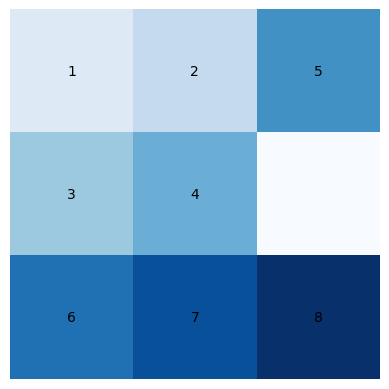

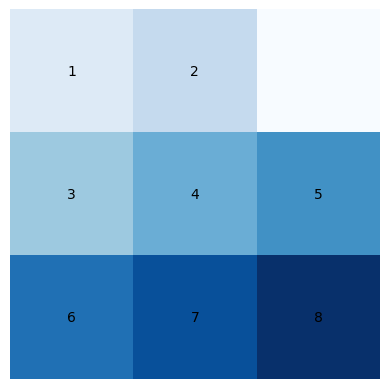

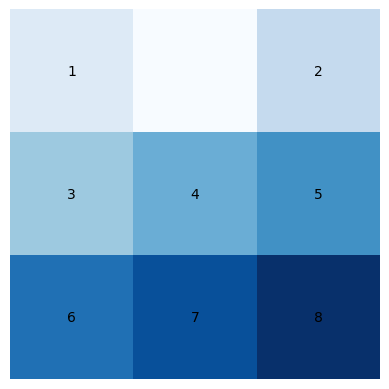

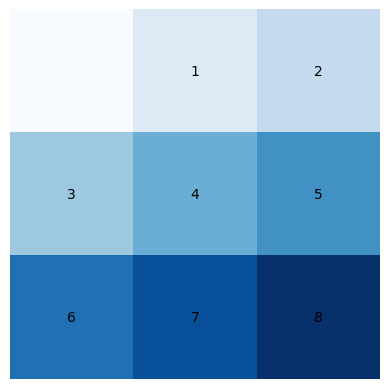

In [ ]:
def plot_board(board):
    fig, ax = plt.subplots()
    mat = np.array(board).reshape(3, 3)
    ax.matshow(mat, cmap="Blues", vmin=0, vmax=8)
    for i in range(3):
        for j in range(3):
            c = mat[j, i]
            if c == 0:
                ax.text(i, j, ' ', va='center', ha='center')
            else:
                ax.text(i, j, str(c), va='center', ha='center')
    plt.axis('off')
    plt.show()

solution = astar_search(start, goal)

current = start
plot_board(current)
for action in solution:
    blank = current.index(0)
    tile = current.index(action)
    board_list = list(current)
    board_list[blank], board_list[tile] = board_list[tile], board_list[blank]
    current = tuple(board_list)
    plot_board(current)